<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part (key part?) in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbers from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:



Imagine you are a consultant that your assigned coffee shop has hired to provide recommendations on how improve their Yelp rating. You will present your recommendations to your TL (coffeeshop owner/manager) tomorrow during your 1:1. Give  your recommendations in a 3-5 slide presentation with supporting graphs and analysis. Here are a couple suggested questions to address in your presentation:
1. How is the coffee shop doing overall (in terms of Yelp reviews)?
2. What is the coffee shop doing well? - How does that compare to competitors?
3. What is the coffee shop not doing well? - How does that compare to competitors?
4. What are the recommendations for improving? (Summary / Conclusion)
• Try to address one question for a number above.
• Make sure to include plenty of charts & graphs :chart_with_upwards_trend: :bar_chart:
• Include a title slide the the name of your coffeeshop and your name (and a presentation title)
• Try to keep your presentation under 8 minutes.

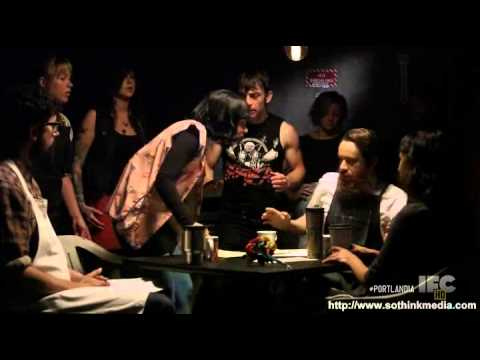

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'E:\\Desktop\\Lambda_School\\Github Repos\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head(1)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating


In [4]:
# shops['star_rating'].replace("star rating", "", inplace=True)
# Removes the words " star rating" from right side of the text within the "star_rating" column
shops['star_rating'] = shops['star_rating'].map(lambda x: x.rstrip(' star rating'))

In [5]:
# Removes ALL date/time patterns from a text column
shops['full_review_text'].replace(
    {'\d+[\/:\-]\d+[\/:\-\s]*[\dAaPpMm]*' : ' ', '\w+\s\d+[\,]\s\d+' : ' '},
    regex=True,
    inplace=True,
    )

In [6]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! ...,5.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in A...",4.0
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved t...,4.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating ...,2.0
4,The Factory - Cafe With a Soul,1 check-in They are located within the Nort...,4.0


In [7]:
shops.tail()

,coffee_shop_name,full_review_text,star_rating
7611,The Steeping Room,I actually step into this restaurant by cha...,4.0
7612,The Steeping Room,"Ok, The Steeping Room IS awesome. How do th...",5.0
7613,The Steeping Room,"Loved coming here for tea, and the atmosphe...",4.0
7614,The Steeping Room,The food is just average. The booths didn't...,3.0
7615,The Steeping Room,I finally stopped in for lunch with my coll...,4.0


In [8]:
shops['coffee_shop_name'].value_counts().head()

Epoch Coffee                       400
Halcyon                            300
The Factory - Cafe With a Soul     244
Houndstooth Coffee                 200
Venezia Italian Gelato             200
Name: coffee_shop_name, dtype: int64

In [9]:
h = shops[shops['coffee_shop_name'].str.contains('Halcyon')]

In [10]:
h.head()

,coffee_shop_name,full_review_text,star_rating
3006,Halcyon,1 check-in I was craving smores all day and...,4.0
3007,Halcyon,1 check-in Listed in ATX The vibe in here i...,2.0
3008,Halcyon,This is based on experiencing multiple side...,2.0
3009,Halcyon,"1 check-in Heard good things about Halcyon,...",5.0
3010,Halcyon,Out for my own personal coffee tour of down...,3.0


In [11]:
h.shape

(300, 3)

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal


Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part (key part?) in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbers from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:
​
​
​
Imagine you are a consultant that your assigned coffee shop has hired to provide recommendations on how improve their Yelp rating. You will present your recommendations to your TL (coffeeshop owner/manager) tomorrow during your 1:1. Give  your recommendations in a 3-5 slide presentation with supporting graphs and analysis. Here are a couple suggested questions to address in your presentation:
1. How is the coffee shop doing overall (in terms of Yelp reviews)?
2. What is the coffee shop doing well? - How does that compare to competitors?
3. What is the coffee shop not doing well? - How does that compare to competitors?
4. What are the recommendations for improving? (Summary / Conclusion)
• Try to address one question for a number above.
• Make sure to include plenty of charts & graphs :chart_with_upwards_trend: :bar_chart:
• Include a title slide the the name of your coffeeshop and your name (and a presentation title)
• Try to keep your presentation under 8 minutes.

In [12]:
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [13]:
nlp = spacy.load("en_core_web_lg")

In [14]:
h.head()

,coffee_shop_name,full_review_text,star_rating
3006,Halcyon,1 check-in I was craving smores all day and...,4.0
3007,Halcyon,1 check-in Listed in ATX The vibe in here i...,2.0
3008,Halcyon,This is based on experiencing multiple side...,2.0
3009,Halcyon,"1 check-in Heard good things about Halcyon,...",5.0
3010,Halcyon,Out for my own personal coffee tour of down...,3.0


In [15]:
import re

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [16]:
h['tokens'] = h['full_review_text'].apply(tokenize)

C:\Users\Sarmen\.conda\envs\U4-S1-M1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
h['tokens'].head()

3006    [1, checkin, i, was, craving, smores, all, day...
3007    [1, checkin, listed, in, atx, the, vibe, in, h...
3008    [this, is, based, on, experiencing, multiple, ...
3009    [1, checkin, heard, good, things, about, halcy...
3010    [out, for, my, own, personal, coffee, tour, of...
Name: tokens, dtype: object

In [18]:
# h['full_review_text'].value_counts(normalize=True)

In [19]:
h['tokens'].value_counts(normalize=True)[:20]

[listed, in, yelp, 100, challenge, 2016, thai, tea, was, okay, kind, of, offtasting, liked, how, late, theyre, open, as, well, as, the, concept, of, the, bar, livemusic, though, kind, of, have, mixed, feelings, about, cause, its, too, loud, to, hear, the, person, next, to, you, if, youre, drinking, coffee, or, tea, guess, if, your, boozing, though, it, doesnt, matter]                                                                                                                                                                                                                                                                                                       0.01
[1, checkin, a, date, night, place, if, ive, ever, seen, one, before, it, had, a, distinct, hipstery, vibe, and, its, probably, a, place, youd, expect, to, see, in, austin, the, guy, we, were, getting, advice, from, at, berry, austin, suggested, that, we, come, here, for, the, best, hot, chocolate, and, smores, in, town, since, 

In [20]:
# Start here

In [21]:
h['full_review_text'].head()

3006       1 check-in I was craving smores all day and...
3007       1 check-in Listed in ATX The vibe in here i...
3008       This is based on experiencing multiple side...
3009       1 check-in Heard good things about Halcyon,...
3010       Out for my own personal coffee tour of down...
Name: full_review_text, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [22]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
h['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 1482),
 ('a', 1080),
 ('and', 1041),
 ('to', 702),
 ('i', 693),
 ('was', 549),
 ('of', 528),
 ('is', 444),
 ('it', 438),
 ('for', 408)]

In [23]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [24]:
# Use the Function
wc = count(h['tokens'])

In [25]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
81,the,276,1482,1.0,0.046468,0.046468,0.92
34,a,255,1080,2.0,0.033863,0.080331,0.85
29,and,264,1041,3.0,0.032640,0.112971,0.88
13,to,243,702,4.0,0.022011,0.134983,0.81
51,i,204,693,5.0,0.021729,0.156712,0.68


In [26]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [27]:
wc[wc['rank'] <= 200]['cul_pct_total'].max()

0.6883642178534476

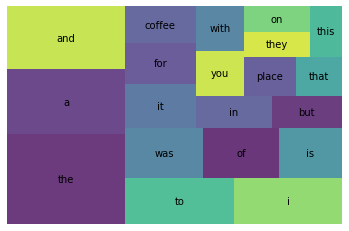

In [28]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [29]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [30]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(h['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

h['tokens'] = tokens

C:\Users\Sarmen\.conda\envs\U4-S1-M1\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [31]:
h['tokens'].head()

3006    [   , 1, check-in, I, was, craving, smores, al...
3007    [   , 1, check-in, Listed, in, ATX, The, vibe,...
3008    [   , This, is, based, on, experiencing, multi...
3009    [   , 1, check-in, Heard, good, things, about,...
3010    [   , Out, for, my, own, personal, coffee, tou...
Name: tokens, dtype: object

In [32]:
wc = count(h['tokens'])

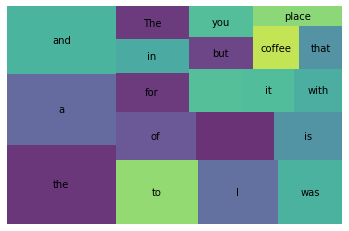

In [33]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [34]:
wc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
91,the,267,1155,1.0,0.035144,0.035144,0.89
38,a,255,1035,2.0,0.031492,0.066636,0.85
31,and,264,996,3.0,0.030306,0.096942,0.88
15,to,243,702,4.0,0.021360,0.118302,0.81
48,I,204,687,5.0,0.020904,0.139206,0.68
85,was,198,549,6.0,0.016705,0.155911,0.66
29,of,216,522,7.0,0.015883,0.171794,0.72
45,,183,513,8.0,0.015609,0.187403,0.61
42,is,198,441,9.0,0.013419,0.200822,0.66
109,for,177,387,10.0,0.011775,0.212597,0.59


In [35]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [36]:
STOP_WORDS = nlp.Defaults.stop_words

# .union(['', ' ','  ','   ', '-', '1', 'the,', ' the', 'the ',
#                                             'be', 'like' ,'coffee', ''])

In [37]:
tokens = []

for doc in tokenizer.pipe(h['full_review_text'], batch_size = 500):
    
    doc_tokens = []
    
    for token in doc:
        if token.text not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
    
    tokens.append(doc_tokens)

h['tokens'] = tokens

C:\Users\Sarmen\.conda\envs\U4-S1-M1\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [38]:
h.head(5)

,coffee_shop_name,full_review_text,star_rating,tokens
3006,Halcyon,1 check-in I was craving smores all day and...,4.0,"[ , 1, check-in, i, craving, smores, day, fi..."
3007,Halcyon,1 check-in Listed in ATX The vibe in here i...,2.0,"[ , 1, check-in, listed, atx, the, vibe, goo..."
3008,Halcyon,This is based on experiencing multiple side...,2.0,"[ , this, based, experiencing, multiple, sid..."
3009,Halcyon,"1 check-in Heard good things about Halcyon,...",5.0,"[ , 1, check-in, heard, good, things, halcyo..."
3010,Halcyon,Out for my own personal coffee tour of down...,3.0,"[ , out, personal, coffee, tour, downtown, a..."


In [39]:
wc = count(h['tokens'])

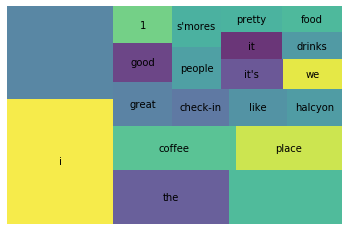

In [40]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [41]:
wc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,i,204,687,1.0,0.036710,0.036710,0.68
32,,183,513,2.0,0.027413,0.064123,0.61
15,the,177,324,3.0,0.017313,0.081436,0.59
5,,300,315,4.0,0.016832,0.098269,1.00
197,coffee,171,285,5.0,0.015229,0.113498,0.57
63,place,159,246,6.0,0.013145,0.126643,0.53
24,great,96,138,7.0,0.007374,0.134017,0.32
7,good,93,120,8.0,0.006412,0.140430,0.31
31,1,114,114,9.0,0.006092,0.146521,0.38
42,check-in,111,111,10.0,0.005931,0.152453,0.37


In [42]:
h.head()

,coffee_shop_name,full_review_text,star_rating,tokens
3006,Halcyon,1 check-in I was craving smores all day and...,4.0,"[ , 1, check-in, i, craving, smores, day, fi..."
3007,Halcyon,1 check-in Listed in ATX The vibe in here i...,2.0,"[ , 1, check-in, listed, atx, the, vibe, goo..."
3008,Halcyon,This is based on experiencing multiple side...,2.0,"[ , this, based, experiencing, multiple, sid..."
3009,Halcyon,"1 check-in Heard good things about Halcyon,...",5.0,"[ , 1, check-in, heard, good, things, halcyo..."
3010,Halcyon,Out for my own personal coffee tour of down...,3.0,"[ , out, personal, coffee, tour, downtown, a..."


In [43]:
STOP_WORDS = nlp.Defaults.stop_words.union(['', ' ','  ','   ', '-', '1', 'the,', ' the', 'the ',
                                            'be', 'like' ,'coffee', ''])

In [44]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if token.text not in STOP_WORDS:
            if ((token.is_stop == False) and (token.is_punct == False)) and ((token not in STOP_WORDS) and (token.pos_!= 'PRON')):
                lemmas.append(token.lemma_)
    
    return lemmas

In [45]:
tokens = []

for doc in tokenizer.pipe(h['full_review_text'], batch_size=1000):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
h['tokens'] = tokens

C:\Users\Sarmen\.conda\envs\U4-S1-M1\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


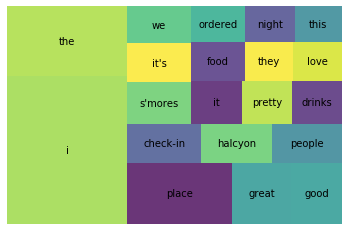

In [46]:
wc = count(h['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [47]:
h['lemmas'] = h['full_review_text'].apply(get_lemmas)

C:\Users\Sarmen\.conda\envs\U4-S1-M1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
h['lemmas'].value_counts(normalize=True)[:1]

[list, yelp, 100, challenge, 2016, thai, tea, okay, kind, tasting, like, late, be, open, concept, bar, live, music, kind, mix, feeling, because, be, loud, hear, person, be, drink, tea, guess, boozing, not, matter]    0.01
Name: lemmas, dtype: float64

In [49]:
wc = count(h['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

wc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
10,the,177,327,1.0,0.020667,0.020667,0.59
57,place,171,318,2.0,0.020099,0.040766,0.57
90,be,120,288,3.0,0.018203,0.058969,0.40
72,not,153,249,4.0,0.015738,0.074706,0.51
3,good,144,210,5.0,0.013273,0.087979,0.48
32,drink,108,171,6.0,0.010808,0.098786,0.36
40,check,159,168,7.0,0.010618,0.109405,0.53
21,great,102,156,8.0,0.009860,0.119264,0.34
169,halcyon,90,153,9.0,0.009670,0.128934,0.30
161,order,102,141,10.0,0.008912,0.137846,0.34


In [50]:
print(wc['word'].iloc[2])

be


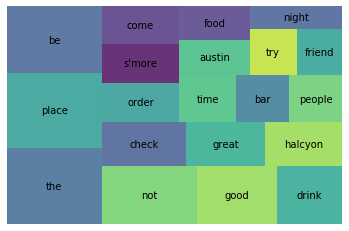

In [51]:
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [52]:
customize_stop_words = [
    'the', 'be'
]
for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

In [53]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if token.text not in STOP_WORDS:
            if ((token.is_stop == False) and (token.is_punct == False)) and ((token not in STOP_WORDS) and (token.pos_!= 'PRON')):
                lemmas.append(token.lemma_)
    
    return lemmas

tokens = []

for doc in tokenizer.pipe(h['full_review_text'], batch_size=1000):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
h['tokens'] = tokens

C:\Users\Sarmen\.conda\envs\U4-S1-M1\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [54]:
tokens = []

for doc in tokenizer.pipe(h['full_review_text'], batch_size=1000):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
h['tokens'] = tokens

C:\Users\Sarmen\.conda\envs\U4-S1-M1\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


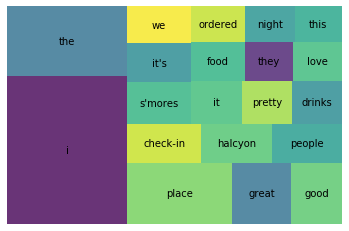

In [55]:
wc = count(h['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [56]:
h['lemmas'] = h['full_review_text'].apply(get_lemmas)

C:\Users\Sarmen\.conda\envs\U4-S1-M1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
h['lemmas'].value_counts(normalize=True)[:1]

[list, yelp, 100, challenge, 2016, thai, tea, okay, kind, tasting, like, late, be, open, concept, bar, live, music, kind, mix, feeling, because, be, loud, hear, person, be, drink, tea, guess, boozing, not, matter]    0.01
Name: lemmas, dtype: float64

In [58]:
wc = count(h['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

wc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
10,the,177,327,1.0,0.020667,0.020667,0.59
57,place,171,318,2.0,0.020099,0.040766,0.57
90,be,120,288,3.0,0.018203,0.058969,0.40
72,not,153,249,4.0,0.015738,0.074706,0.51
3,good,144,210,5.0,0.013273,0.087979,0.48
32,drink,108,171,6.0,0.010808,0.098786,0.36
40,check,159,168,7.0,0.010618,0.109405,0.53
21,great,102,156,8.0,0.009860,0.119264,0.34
169,halcyon,90,153,9.0,0.009670,0.128934,0.30
161,order,102,141,10.0,0.008912,0.137846,0.34


In [59]:
print(wc['word'].iloc[2])

be


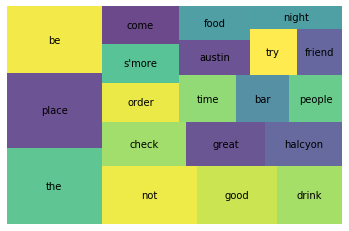

In [60]:
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

